# Q3

In [ ]:
# Read file and display dataframe
import pandas as pd
prodf=pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
prodf.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [ ]:
# Number of unique values for each column
prodf.nunique()

title                           1201
title_orig                      1203
price                            127
retail_price                     104
currency_buyer                     1
units_sold                        15
uses_ad_boosts                     2
rating                           192
rating_count                     761
rating_five_count                605
rating_four_count                440
rating_three_count               384
rating_two_count                 262
rating_one_count                 330
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
h

In [ ]:
# Removing Irrelevant Columns
prodf=prodf.drop(columns=["currency_buyer","urgency_text","theme","crawl_month","product_url","product_picture","merchant_profile_picture","merchant_info_subtitle","title","tags"])

In [ ]:
# Revenue and discount calculation
prodf["revenue"]=prodf["price"]*prodf["units_sold"]
prodf["discount"]=prodf["retail_price"]-prodf["price"]
prodf["discount%"]=(prodf["retail_price"]-prodf["price"])*100/prodf["retail_price"]

In [ ]:
# Assigning integer ids to products and merchants
from sklearn import preprocessing as pp
le=pp.LabelEncoder()
prodf["product_id"]=le.fit_transform(prodf["product_id"])
prodf["merchant_id"]=le.fit_transform(prodf["merchant_id"])

In [ ]:
prodf['has_urgency_banner'] = prodf['has_urgency_banner'].fillna(0)
prodf.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,revenue,discount,discount%
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,white,M,50,Livraison standard,4,0,34,50,1.0,CN,zgrdejia,zgrdejia,568,4.128521,533,0,1051,1600.0,-2.00,-14.285714
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,green,XS,50,Livraison standard,2,0,41,50,1.0,CN,SaraHouse,sarahouse,17752,3.899673,143,0,62,160000.0,14.00,63.636364
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,CN,hxt520,hxt520,295,3.989831,808,0,1086,800.0,35.00,81.395349
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,black,M,50,Livraison standard,2,0,41,50,0.0,CN,allenfan,allenfan,23832,4.020435,465,0,547,40000.0,0.00,0.000000
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,yellow,S,1,Livraison standard,1,0,35,50,1.0,CN,youngpeopleshop,happyhorses,14482,4.001588,640,0,1221,272.0,0.28,9.333333


**Reducing number of categories for colours and sizes**

In [ ]:
colours=prodf["product_color"].value_counts()
colours[colours>2]

black               302
white               254
yellow              105
blue                 99
pink                 99
red                  93
green                90
grey                 71
purple               53
armygreen            31
winered              28
navyblue             28
orange               27
multicolor           20
beige                14
khaki                12
lightblue            12
gray                 11
white & green        10
skyblue               8
rosered               8
coffee                7
brown                 7
darkblue              6
rose                  5
floral                5
black & green         4
navy                  4
leopard               4
fluorescentgreen      4
lightpink             4
camouflage            3
lightgreen            3
Black                 3
White                 3
black & white         3
orange-red            3
Name: product_color, dtype: int64

In [ ]:
prodf["product_color"]=prodf["product_color"].replace({"armygreen":"green",
                                                       "winered":"red",
                                                       "navyblue":"blue",
                                                       "Black":"black",
                                                       "White":"white",
                                                       "lightgreen":"green",
                                                       "lightpink":"pink",
                                                       "fluorescentgreen":"green",
                                                       "rose":"red",
                                                       "darkblue":"blue",
                                                       "navy":"blue",
                                                       "rosered":"red",
                                                       "orange-red":"red",
                                                       "coffee":"brown",
                                                       "gray":"grey",
                                                       "skyblue":"blue",
                                                       "lightblue":"blue"})

In [ ]:
colours=["black", "white", "yellow", "blue", "pink", "red", "green", "grey", "purple", "orange", "multicolor", "brown"]
others=[]
for clr in prodf["product_color"].tolist():
  if clr not in colours:
    others.append(clr)
prodf["product_color"]=prodf["product_color"].replace(to_replace=others,value="other")
prodf["product_color"].value_counts()

black         305
white         257
other         185
blue          157
red           137
green         128
yellow        105
pink          103
grey           82
purple         53
orange         27
multicolor     20
brown          14
Name: product_color, dtype: int64

In [ ]:
sizes=prodf["product_variation_size_id"].value_counts()
sizes[sizes>1]

S               641
XS              356
M               200
XXS             100
L                49
S.               18
XL               17
XXL              15
XXXS              6
Size S            5
4XL               5
XS.               5
s                 5
M.                4
SIZE XS           4
2XL               4
Size-XS           4
2pcs              3
10 ml             3
SizeL             3
Size-S            3
33                3
34                3
Size M            2
25                2
XXXXXL            2
S Pink            2
1                 2
One Size          2
size S            2
Suit-S            2
XXXXL             2
S(bust 88cm)      2
29                2
EU 35             2
3XL               2
Size -XXS         2
Size S.           2
35                2
1 pc.             2
Size4XL           2
SIZE-XXS          2
5XL               2
Name: product_variation_size_id, dtype: int64

In [ ]:
prodf["product_variation_size_id"]=prodf["product_variation_size_id"].replace({"Size S":"S",
                                                                               "XS.":"XS",
                                                                               "s":"S",
                                                                               "M.":"M",
                                                                               "Size4XL":"XXXXL",
                                                                               "SIZE-XXS":"XXS",
                                                                               "SIZE XS":"XS",
                                                                               "Size-XS":"XS",
                                                                               "S.":"S",
                                                                               "SizeL":"L",
                                                                               "Size-S":"S",
                                                                               "Size M":"M",
                                                                               "S(bust 88cm)":"S",
                                                                               "4XL":"XXXXL",
                                                                               "5XL":"XXXXXL",
                                                                               "Size S.":"S",
                                                                               "Size -XXS":"XXS",
                                                                               "size S":"S",
                                                                               "Suit-S":"S",
                                                                               "S Pink":"S"})

In [ ]:
sizes=["XXXS","XXS","XS","S","M","L","XL","XXL","XXXXL","XXXXXL"]
others=[]
for sz in prodf["product_variation_size_id"].tolist():
  if sz not in sizes:
    others.append(sz)
prodf["product_variation_size_id"]=prodf["product_variation_size_id"].replace(to_replace=others,value="other")
prodf["product_variation_size_id"].value_counts()

S         682
XS        369
M         206
other     109
XXS       104
L          52
XL         17
XXL        15
XXXXL       9
XXXS        6
XXXXXL      4
Name: product_variation_size_id, dtype: int64

In [ ]:
prodf.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,revenue,discount,discount%
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,white,M,50,Livraison standard,4,0,34,50,1.0,CN,zgrdejia,zgrdejia,568,4.128521,533,0,1051,1600.0,-2.00,-14.285714
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,green,XS,50,Livraison standard,2,0,41,50,1.0,CN,SaraHouse,sarahouse,17752,3.899673,143,0,62,160000.0,14.00,63.636364
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,other,XS,1,Livraison standard,3,0,36,50,1.0,CN,hxt520,hxt520,295,3.989831,808,0,1086,800.0,35.00,81.395349
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,black,M,50,Livraison standard,2,0,41,50,0.0,CN,allenfan,allenfan,23832,4.020435,465,0,547,40000.0,0.00,0.000000
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,yellow,S,1,Livraison standard,1,0,35,50,1.0,CN,youngpeopleshop,happyhorses,14482,4.001588,640,0,1221,272.0,0.28,9.333333


Binary Variables: uses_ad_boosts, shipping_is_express, has_urgency_banner, merchant_has_profile_picture<br>
Ordered Categorical Variables: shipping_option_price (already label encoded), product_variation_size_id<br>
Unordered Categorical Variables: badge_type (already one hot encoded), product_color, shipping_option_name, origin_country

In [ ]:
# Label Encoding & One Hot Encoding
prodf['product_variation_size_id'] = prodf['product_variation_size_id'].apply(lambda x: ['XXXS','XXS','XS','S','M','other','L','XL','XXL','XXXXL','XXXXXL'].index(x))
sales = pd.get_dummies(prodf, columns = ['product_color','origin_country','shipping_option_name'], prefix = ['color','origin','ship_by'], drop_first=True)

In [ ]:
# Remove columns not participating in ML
sales_data=sales.drop(columns=['title_orig','merchant_title','merchant_name','revenue','rating_count','rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count'])
sales_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,discount,discount%,color__blue,color__brown,color__green,color__grey,color__multicolor,color__orange,color__other,color__pink,color__purple,color__red,color__white,color__yellow,origin__CN,origin__GB,origin__SG,origin__US,origin__VE,ship_by__Envio Padrão,ship_by__Envío normal,ship_by__Expediere Standard,ship_by__Livraison Express,ship_by__Livraison standard,ship_by__Spedizione standard,ship_by__Standard Shipping,ship_by__Standardowa wysyłka,ship_by__Standardversand,ship_by__Standart Gönderi,ship_by__Стандартная доставка,ship_by__الشحن القياسي,ship_by__การส่งสินค้ามาตรฐาน,ship_by__ការដឹកជញ្ជូនតាមស្តង់ដារ
0,16.00,14,100,0,3.76,0,0,0,0,4,50,4,0,34,50,1.0,568,4.128521,533,0,1051,-2.00,-14.285714,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,8.00,22,20000,1,3.45,0,0,0,0,2,50,2,0,41,50,1.0,17752,3.899673,143,0,62,14.00,63.636364,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8.00,43,100,0,3.57,0,0,0,0,2,1,3,0,36,50,1.0,295,3.989831,808,0,1086,35.00,81.395349,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,8.00,8,5000,1,4.03,0,0,0,0,4,50,2,0,41,50,0.0,23832,4.020435,465,0,547,0.00,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.72,3,100,1,3.10,0,0,0,0,3,1,1,0,35,50,1.0,14482,4.001588,640,0,1221,0.28,9.333333,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Discrete Variables: units_sold, product_variation_inventory, countries_shipped_to, inventory_total, merchant_rating_count<br>
Continuous Variables: price, retail_price, merchant_rating, discount, discount%

In [ ]:
# Standardisation
for col in ["price", "retail_price", "merchant_rating", "discount", "discount%"]:
  sales_data[col]=pp.scale(sales_data[col])

In [ ]:
X=sales_data.drop(columns=['rating'])
Y=sales_data["rating"]
X

,price,retail_price,units_sold,uses_ad_boosts,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,discount,discount%,color__blue,color__brown,color__green,color__grey,color__multicolor,color__orange,color__other,color__pink,color__purple,color__red,color__white,color__yellow,origin__CN,origin__GB,origin__SG,origin__US,origin__VE,ship_by__Envio Padrão,ship_by__Envío normal,ship_by__Expediere Standard,ship_by__Livraison Express,ship_by__Livraison standard,ship_by__Spedizione standard,ship_by__Standard Shipping,ship_by__Standardowa wysyłka,ship_by__Standardversand,ship_by__Standart Gönderi,ship_by__Стандартная доставка,ship_by__الشحن القياسي,ship_by__การส่งสินค้ามาตรฐาน,ship_by__ការដឹកជញ្ជូនតាមស្តង់ដារ
0,1.952444,-0.306068,100,0,0,0,0,0,4,50,4,0,34,50,1.0,568,0.469832,533,0,1051,-0.577183,-0.987197,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-0.082775,-0.042461,20000,1,0,0,0,0,2,50,2,0,41,50,1.0,17752,-0.648119,143,0,62,-0.032775,0.919374,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-0.082775,0.649507,100,0,0,0,0,0,2,1,3,0,36,50,1.0,295,-0.207689,808,0,1086,0.681760,1.353895,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.082775,-0.503773,5000,1,0,0,0,0,4,50,2,0,41,50,0.0,23832,-0.058184,465,0,547,-0.509132,-0.637659,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-1.426020,-0.668528,100,1,0,0,0,0,3,1,1,0,35,50,1.0,14482,-0.150252,640,0,1221,-0.499605,-0.409294,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,-0.591580,-0.470822,10000,1,0,0,0,0,3,50,2,0,41,50,0.0,5316,0.939214,729,0,739,-0.407055,0.177930,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1569,-1.609190,1.077868,100,1,0,0,0,0,3,2,1,0,26,50,1.0,4435,-1.642825,74,0,1266,1.328244,1.721722,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1570,-0.845983,-0.141314,100,0,0,0,0,0,5,15,2,0,11,50,0.0,210,-0.344110,724,0,948,-0.032775,1.165221,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1571,1.189237,-0.404921,100,0,0,0,0,0,3,36,3,0,29,50,0.0,31,-1.261104,843,0,1303,-0.577183,-1.082525,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X2,Y_train,Y2 = train_test_split(X,Y,test_size = 0.3)
X_val,X_test,Y_val,Y_test = train_test_split(X2,Y2,test_size = 0.5)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(1101, 53) (1101,) (236, 53) (236,) (236, 53) (236,)


In [ ]:
# Lasso Regression Model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
for alpha in [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]:
  print("Alpha = "+str(alpha))
  LsM = Lasso(alpha=alpha)
  LsM.fit(X_train,Y_train)
  Y_pred = LsM.predict(X_val)
  rmse = mean_squared_error(Y_val,Y_pred,squared=False)
  print(f'RMSE: {rmse}')

Alpha = 0.0001
RMSE: 0.5339216997773369
Alpha = 0.0005
RMSE: 0.5298869932015374
Alpha = 0.001
RMSE: 0.5267902786041547
Alpha = 0.005
RMSE: 0.5235760718336689
Alpha = 0.01
RMSE: 0.5247932210996465
Alpha = 0.05
RMSE: 0.5442893607724568
Alpha = 0.1
RMSE: 0.5603500455066446
Alpha = 0.5
RMSE: 0.5606343455767772


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.12757092302513, tolerance: 0.02717097925522253
  positive)


Least RMSE=0.5236 for Alpha=0.005

In [ ]:
# Support Vector Regression Model (RBF kernel takes least time & is usually taken)
from sklearn.svm import SVR
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'epsilon':[0.0001,0.001,0.01,0.1,1]}
for c in param_grid["C"]:
  print("C = "+str(c))
  for e in param_grid["epsilon"]:
    print("Epsilon = "+str(e))
    svr=SVR(C=c,epsilon=e)
    svr.fit(X_train,Y_train)
    Y_pred = svr.predict(X_val)
    rmse = mean_squared_error(Y_val,Y_pred,squared=False)
    print(f'RMSE: {rmse}')
  print()

C = 0.0001
Epsilon = 0.0001
RMSE: 0.559483971382848
Epsilon = 0.001
RMSE: 0.559484481875455
Epsilon = 0.01
RMSE: 0.5594846654419433
Epsilon = 0.1
RMSE: 0.5594857549366494
Epsilon = 1
RMSE: 0.5687336588543711
C = 0.001
Epsilon = 0.0001
RMSE: 0.5593842884634151
Epsilon = 0.001
RMSE: 0.5593698370312395
Epsilon = 0.01
RMSE: 0.5593278518092174
Epsilon = 0.1
RMSE: 0.559373030700493
Epsilon = 1
RMSE: 0.5688213174523118
C = 0.01
Epsilon = 0.0001
RMSE: 0.5592109637508849
Epsilon = 0.001
RMSE: 0.559220307758806
Epsilon = 0.01
RMSE: 0.5591867108186128
Epsilon = 0.1
RMSE: 0.5591387124045135
Epsilon = 1
RMSE: 0.5696056386524938
C = 0.1
Epsilon = 0.0001
RMSE: 0.5605331713014764
Epsilon = 0.001
RMSE: 0.5605214809935996
Epsilon = 0.01
RMSE: 0.5603061077520247
Epsilon = 0.1
RMSE: 0.5594298614814764
Epsilon = 1
RMSE: 0.576021257834458
C = 1
Epsilon = 0.0001
RMSE: 0.5611932972066781
Epsilon = 0.001
RMSE: 0.561247246217837
Epsilon = 0.01
RMSE: 0.5609061555500914
Epsilon = 0.1
RMSE: 0.5618832703624611
Epsi

Least RMSE=0.55914 for Epsilon=0.1 & C=0.01

In [ ]:
# Random Forest Regression Model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
n_estimators = [10,50,100,500,1000]
max_features = ['auto','sqrt','log2']
max_depth = [10,50,100,None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
rf = RandomForestRegressor()
rfr = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
rfr.fit(X_train,Y_train)
rfr.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
rf = RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=5)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_val)
rmse = mean_squared_error(Y_val,Y_pred,squared=False)
print(f'RMSE: {rmse}')

RMSE: 0.4871770117416617


Random Forest Regression Model gave the least RMSE=0.4872. Lets try it out on testing set.

In [ ]:
Y_pred = rf.predict(X_test)
rmse = mean_squared_error(Y_test,Y_pred,squared=False)
print(f'RMSE: {rmse}')

RMSE: 0.43979964116948683


Testing RMSE=0.44 suggests the model is usable

# Q4 & Q5

In [ ]:
import pandas as pd
df0=pd.read_csv("0.csv",header=None)
df1=pd.read_csv("1.csv",header=None)
df2=pd.read_csv("2.csv",header=None)
df3=pd.read_csv("3.csv",header=None)
df=pd.concat([df0,df1,df2,df3])
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,2.0,5.0,-10.0,-17.0,-3.0,-2.0,12.0,2.0,2.0,2.0,-4.0,-28.0,1.0,-6.0,-5.0,-1.0,1.0,0.0,11.0,9.0,-4.0,14.0,2.0,-2.0,-2.0,-8.0,-17.0,1.0,-2.0,6.0,-14.0,-3.0,-4.0,-2.0,27.0,18.0,-6.0,-17.0,-4.0,1.0,-2.0,1.0,13.0,-12.0,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
2918,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,9.0,7.0,5.0,50.0,31.0,18.0,-3.0,-3.0,1.0,-2.0,17.0,-6.0,-10.0,-18.0,-11.0,-5.0,-2.0,-2.0,10.0,21.0,-2.0,15.0,5.0,-2.0,-2.0,-6.0,-6.0,-50.0,-16.0,7.0,-12.0,-2.0,-3.0,1.0,21.0,48.0,12.0,-12.0,-1.0,3.0,2.0,5.0,-12.0,-8.0,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
2919,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,4.0,0.0,-3.0,33.0,-2.0,-1.0,-1.0,2.0,-3.0,0.0,-38.0,-25.0,0.0,3.0,2.0,-1.0,0.0,-3.0,14.0,0.0,-1.0,-3.0,-3.0,-4.0,-3.0,-6.0,-2.0,13.0,-5.0,-19.0,-6.0,-5.0,-4.0,1.0,41.0,-10.0,-4.0,-9.0,3.0,3.0,2.0,3.0,1.0,50.0,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
2920,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,-1.0,-1.0,-5.0,12.0,1.0,-19.0,0.0,-4.0,-4.0,0.0,25.0,0.0,3.0,-5.0,1.0,1.0,-2.0,-4.0,-31.0,-17.0,-7.0,5.0,3.0,-5.0,-3.0,-1.0,4.0,-48.0,-13.0,-5.0,-14.0,6.0,5.0,6.0,-3.0,79.0,15.0,-6.0,-3.0,-1.0,-3.0,-1.0,-1.0,27.0,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


In [ ]:
X=df.drop(columns=64)
Y=df[64]

In [ ]:
# Standardisation
from sklearn import preprocessing as pp
for col in X.columns:
  X[col]=pp.scale(X[col])

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,1.428445,0.401724,1.150179,1.173139,-0.047110,-0.482211,-4.293826,-4.240470,-0.459858,0.224160,0.943401,1.860780,-1.008376,-1.148141,-4.687136,-2.870915,0.977625,0.557215,-0.048305,-1.118587,1.500757,0.786079,3.699334,4.773384,-1.435773,-0.023534,0.149168,0.229487,0.723839,0.781636,-2.389018,-1.174740,1.688676,0.227592,0.553157,0.089155,-1.280924,-0.030327,-3.133125,0.311949,-0.340106,-0.424570,-2.255355,-3.587575,-0.599384,-0.592158,-2.638500,-0.472078,-1.449747,0.152056,0.365672,1.863863,-0.445929,-0.410054,0.894454,-1.785637,3.396947,0.394898,1.764490,0.772653,0.232428,-0.259303,-2.278454,1.069524
1,-2.503492,-0.448155,-0.853937,-0.842622,0.737220,-0.017247,1.445765,-0.606050,0.588529,-0.282565,0.144167,1.047392,-1.732227,-1.263605,-1.859278,-3.325940,1.912308,0.892739,1.149371,-1.118587,1.278276,2.459553,3.097846,3.306738,-1.492316,-0.525205,-1.262488,-0.317274,0.004883,0.169099,-4.319109,-0.075906,-0.343681,0.639210,2.348314,1.589369,0.114153,0.083539,3.089289,0.247008,0.428169,-0.095361,0.158967,-0.728748,1.169911,-0.095314,0.057639,-0.472078,-2.163987,-0.266033,-0.040793,0.913042,-0.108561,-0.062989,-4.087375,-1.587727,2.627872,0.561499,1.362038,0.772653,0.736892,0.836588,4.451912,1.005130
2,-0.995352,-0.618131,-1.455172,-0.977006,-1.167581,-0.210982,-3.098077,0.821758,0.036746,0.477522,0.943401,2.267474,1.330217,0.352887,1.366869,2.264364,-0.012039,-0.281595,-0.447530,-0.712677,-0.390327,-0.420380,-3.358123,-0.759874,-0.531083,-0.107146,-0.455827,-0.180584,-0.437552,-1.132541,-0.577096,-1.368651,-1.134042,-0.513321,-1.441461,-1.547443,-0.778696,-0.675572,-2.973576,-2.805224,1.525705,0.645358,0.963741,-0.456479,-0.544093,0.898373,5.168231,4.494404,-1.339863,-0.934976,-1.666650,0.233884,1.015999,-1.258434,-4.996756,-5.414002,0.430515,0.644800,0.355910,-0.987888,0.400583,0.836588,4.570683,3.130128
3,0.135753,0.316736,0.148121,0.366835,0.008913,0.873935,4.275702,-0.865651,-0.846106,-0.113656,-0.455258,-0.443818,0.996132,0.814742,-0.305948,0.184251,-0.396908,0.053929,0.750146,0.775659,-0.779667,-0.576052,0.571597,-0.826540,0.656322,-0.274370,-0.859158,-1.000725,-1.654248,-1.017690,-4.988732,-1.368651,-0.117864,-0.348673,-1.441461,0.089155,1.397624,-0.333972,-1.058987,0.182066,-1.163258,0.727660,1.768514,-0.184210,0.119392,0.477967,2.190406,1.333916,1.572041,-0.684123,-0.853721,-0.581105,-0.389701,-0.255803,-2.070920,-2.445340,-0.558296,0.394898,1.563264,1.585211,1.857924,1.541089,4.768635,2.808159
4,0.351202,0.061772,0.148121,-0.170702,-0.775416,0.408971,-1.982046,0.367456,0.422994,0.055252,0.943401,1.860780,0.717728,-0.609311,-1.739791,-0.400781,-4.575490,-0.617119,-0.447530,-0.442070,-2.003310,-1.004150,-5.082389,-3.626503,4.275083,0.310913,-1.464153,-1.547486,0.779143,0.475368,3.480034,3.673054,-0.117864,0.227592,0.154234,-0.865527,0.225759,0.576962,-0.460678,0.052184,-0.779121,0.151545,0.762547,1.177137,-0.101770,-0.209971,-2.155610,-1.504074,0.088618,0.486527,1.178601,0.369716,0.622403,0.476890,2.436448,2.568400,-1.876710,-0.604712,0.557136,0.908079,-0.720448,-0.924666,-4.376745,-4.403956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,-0.133558,-0.023216,-0.052291,-0.036318,-1.559746,0.796441,0.250017,0.042954,-0.239145,0.055252,0.543784,0.776263,-0.562930,-0.647798,-0.066974,-0.075763,0.702719,0.221691,0.550533,0.369749,-0.223466,-1.081986,0.090407,-0.359880,-0.248368,-0.023534,0.350833,0.092797,0.613230,0.360517,-0.104421,0.958290,0.164408,-0.101703,-0.244690,-1.001910,-0.946106,0.045584,-0.021918,0.441831,-0.724244,-0.177663,-0.645807,-0.184210,1.501653,0.707279,-0.183806,-1.052576,-0.186090,0.152056,-0.244025,0.233884,0

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X2,Y_train,Y2 = train_test_split(X,Y,test_size = 0.3)
X_val,X_test,Y_val,Y_test = train_test_split(X2,Y2,test_size = 0.5)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(8174, 64) (8174,) (1752, 64) (1752,) (1752, 64) (1752,)


In [ ]:
# Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
n_estimators = [10,20,50,100,200,500,1000]
criterion = ['gini', 'entropy']
for c in criterion:
  print("Criterion = "+c)
  for n in n_estimators:
    print("No of estimators = "+str(n))
    rfc = RandomForestClassifier()
    rfc.fit(X_train,Y_train)
    Y_pred = rfc.predict(X_val)
    print(metrics.accuracy_score(Y_val, Y_pred))
  print()

Criterion = gini
No of estimators = 10
0.91324200913242
No of estimators = 20
0.9235159817351598
No of estimators = 50
0.91837899543379
No of estimators = 100
0.9189497716894978
No of estimators = 200
0.9200913242009132
No of estimators = 500
0.9200913242009132
No of estimators = 1000
0.91837899543379

Criterion = entropy
No of estimators = 10
0.9200913242009132
No of estimators = 20
0.9178082191780822
No of estimators = 50
0.9223744292237442
No of estimators = 100
0.9138127853881278
No of estimators = 200
0.9240867579908676
No of estimators = 500
0.9200913242009132
No of estimators = 1000
0.9218036529680366



Best classification accuracy=0.9241 for n_estimators=200 & criterion=entropy

In [ ]:
# Multi-Layer Perceptron Classification (NN) Model
from sklearn.neural_network import MLPClassifier
alphas = [0.0001,0.001,0.01,0.1,1]
for a in alphas:
  print('Alpha = '+str(a))
  mlp = MLPClassifier(alpha=a)
  mlp.fit(X_train, Y_train)
  Y_pred = mlp.predict(X_val)
  print(metrics.accuracy_score(Y_val, Y_pred))

Alpha = 0.0001
0.934931506849315
Alpha = 0.001
0.9452054794520548
Alpha = 0.01
0.934931506849315
Alpha = 0.1
0.9320776255707762
Alpha = 1
0.9309360730593608


Best classification accuracy=0.9452 for alpha=0.001

In [ ]:
# Support Vector Classification Model
from sklearn.svm import SVC
C = [1,5,10,50,100,500,1000]
for c in C:
  print("C = "+str(c))
  svc=SVC(C=c)
  svc.fit(X_train,Y_train)
  Y_pred = svc.predict(X_val)
  print(metrics.accuracy_score(Y_val, Y_pred))

C = 1
0.9006849315068494
C = 5
0.9189497716894978
C = 10
0.916095890410959
C = 50
0.9149543378995434
C = 100
0.9121004566210046
C = 500
0.9115296803652968
C = 1000
0.9115296803652968


Best classification accuracy=0.91895 for C=5

In [ ]:
# Test using MLPC (best accuracy amongst the 3)
mlp = MLPClassifier(alpha=0.001)
mlp.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)
CA = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy = "+str(CA))

Accuracy = 0.9297945205479452


Classification accuracy > 0.9 seems good enough to suggest that the model is usable

---



In a different session with new splits

In [ ]:
# Support Vector Classification Model using Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
C = [1,5,10,50,100,500,1000]
gamma = ['scale','auto',0.1,0.5,1,5,10,50,100]
param_grid = {'C':C,'gamma':gamma}
sv = SVC()
svc = RandomizedSearchCV(estimator = sv, param_distributions = param_grid)
svc.fit(X_train,Y_train)
svc.best_params_

{'C': 1, 'gamma': 'scale'}

In [ ]:
from sklearn import metrics
svc = SVC(C=1,gamma='scale')
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_val)
CA = metrics.accuracy_score(Y_val, Y_pred)
print("Accuracy = "+str(CA))

Accuracy = 0.8875570776255708


In [ ]:
# Multi-Layer Perceptron Classification (NN) Model using Random Search
from sklearn.neural_network import MLPClassifier
neurons = [(10, ),(25, ),(50, ),(75, ),(100, )]
alphas = [0.0001,0.001,0.01,0.1,1]
solver = ['lbfgs','sgd','adam']
activation = ['identity', 'logistic', 'tanh', 'relu']
max_iter = [100,200,500]
learning_rate = ['constant', 'invscaling', 'adaptive']
momentum = [0.1,0.25,0.5,0.75,1]
batch_size = [32,64,100,200]
param_grid = {'hidden_layer_sizes': neurons,
              'alpha': alphas,
              'solver': solver,
              'activation': activation,
              'max_iter': max_iter,
              'learning_rate': learning_rate,
              'batch_size': batch_size,
              'momentum': momentum}
mlp = MLPClassifier()
mlpc = RandomizedSearchCV(estimator = mlp, param_distributions = param_grid)
mlpc.fit(X_train,Y_train)
mlpc.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'logistic',
 'alpha': 0.1,
 'batch_size': 200,
 'hidden_layer_sizes': (50,),
 'learning_rate': 'invscaling',
 'max_iter': 500,
 'momentum': 1,
 'solver': 'adam'}

In [ ]:
mlpc = MLPClassifier(activation = 'logistic',
                     alpha = 0.1,
                     batch_size = 200,
                     hidden_layer_sizes = (50,),
                     learning_rate = 'invscaling',
                     max_iter = 500,
                     momentum = 1,
                     solver = 'adam')
mlpc.fit(X_train,Y_train)
Y_pred = mlpc.predict(X_val)
CA = metrics.accuracy_score(Y_val, Y_pred)
print("Accuracy = "+str(CA))

Accuracy = 0.916095890410959


In [ ]:
# Test using MLPC (best accuracy amongst the 2)
Y_pred = mlpc.predict(X_test)
CA = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy = "+str(CA))

Accuracy = 0.9189497716894978


Testing classification accuracy > 0.9 seems good enough to suggest that neural network is usable here

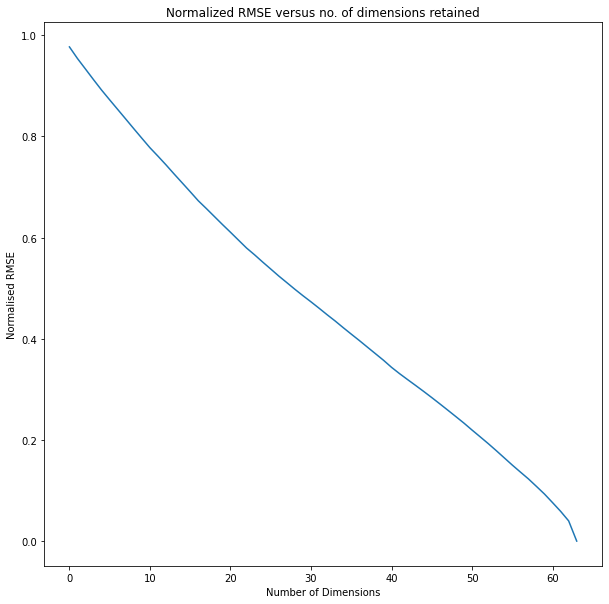

In [ ]:
# Variation of Normalised RMSE with No. of dimensions

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

start=1
end=65
errors=[]
for i in range(start,end):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(X)
    pca_back = pca.inverse_transform(pca_result)
    rmse = np.linalg.norm(X-pca_back,None)
    nRMSE = rmse/np.linalg.norm(X,None)
    errors.append(nRMSE)

plt.figure(figsize=(10,10))
plt.title("Normalized RMSE versus no. of dimensions retained")
plt.xlabel("Number of Dimensions")
plt.ylabel("Normalised RMSE")
plt.plot(errors)
plt.show()

In [ ]:
# standard deviation of the L2 norm of the 64 variable input
np.std(np.linalg.norm(X,axis=1))

2.926578019447692

In [ ]:
# RMSE reconstruction error
pca = PCA(n_components=63)
pca_result = pca.fit_transform(X)
pca_back = pca.inverse_transform(pca_result)
e = np.linalg.norm(X-pca_back)/8
e/sqrt(11678)

0.0399035542704712

Even for 63 dimensions this error is greater than 1%. So PCA can't be used here for compressing without large losses.